In [14]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
comienzo = dt.datetime(2020,8,1)
hoy = dt.datetime.today()

In [15]:
assets = ['BBD.BA', 'WFC.BA', 'KO.BA', 'PBR.BA', 'VALE.BA', 'NOKA.BA','GOLD.BA', 'GE.BA', 'X.BA','T.BA', 'C.BA','AIG.BA']

In [25]:
df = yahoo.download(assets, start = comienzo, end = hoy, interval="15m")['Adj Close'].fillna(method='ffill')

minimal_VaR = pd.DataFrame(index=df.columns)

minimal_VaR['weights'] = [5,5,3,5,3,10,8,5,6,10,10,6]

CVaR = pd.DataFrame(index=df.columns)

CVaR['weights'] = [10,9,3,8,1,5,11,6,6,8,10,15]

portfolio_min = (df * minimal_VaR.weights)

portfolio_cvar = (df * CVaR.weights)

benchmark = df.T.median()

[*********************100%***********************]  12 of 12 completed


In [26]:
df

,AIG.BA,BBD.BA,C.BA,GE.BA,GOLD.BA,KO.BA,NOKA.BA,PBR.BA,T.BA,VALE.BA,WFC.BA,X.BA
Datetime,,,,,,,,,,,,
2020-08-03 11:00:00-03:00,810.0,529.0,2090.0,765.0,3570.0,1167.0,656.0,1076.0,1229.0,748.0,606.5,282.0
2020-08-03 11:15:00-03:00,825.0,524.5,2100.0,775.5,3599.0,1181.0,652.0,1075.0,1232.0,740.0,612.0,289.5
2020-08-03 11:30:00-03:00,820.0,525.5,2105.0,774.0,3610.0,1170.0,650.5,1067.5,1241.0,738.5,610.0,287.5
2020-08-03 11:45:00-03:00,812.0,525.5,2100.0,773.5,3633.0,1167.0,645.5,1067.0,1241.0,736.0,611.0,286.5
2020-08-03 12:00:00-03:00,820.0,527.0,2100.0,776.0,3614.5,1168.5,642.0,1064.0,1241.0,730.0,604.0,287.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 15:45:00-03:00,766.0,515.0,2190.0,815.0,3698.0,1224.0,626.0,1098.0,1275.0,715.0,638.0,299.5
2020-08-07 16:00:00-03:00,775.0,513.0,2200.0,814.0,3696.0,1220.0,627.0,1098.0,1275.0,711.0,636.5,299.5
2020-08-07 16:15:00-03:00,773.0,507.0,2190.0,812.0,3695.0,1222.0,628.0,1093.0,1276.0,711.0,636.5,301.0


In [27]:
portfolio_min

,AIG.BA,BBD.BA,C.BA,GE.BA,GOLD.BA,KO.BA,NOKA.BA,PBR.BA,T.BA,VALE.BA,WFC.BA,X.BA
Datetime,,,,,,,,,,,,
2020-08-03 11:00:00-03:00,4050.0,2645.0,6270.0,3825.0,10710.0,11670.0,5248.0,5380.0,7374.0,7480.0,6065.0,1692.0
2020-08-03 11:15:00-03:00,4125.0,2622.5,6300.0,3877.5,10797.0,11810.0,5216.0,5375.0,7392.0,7400.0,6120.0,1737.0
2020-08-03 11:30:00-03:00,4100.0,2627.5,6315.0,3870.0,10830.0,11700.0,5204.0,5337.5,7446.0,7385.0,6100.0,1725.0
2020-08-03 11:45:00-03:00,4060.0,2627.5,6300.0,3867.5,10899.0,11670.0,5164.0,5335.0,7446.0,7360.0,6110.0,1719.0
2020-08-03 12:00:00-03:00,4100.0,2635.0,6300.0,3880.0,10843.5,11685.0,5136.0,5320.0,7446.0,7300.0,6040.0,1725.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 15:45:00-03:00,3830.0,2575.0,6570.0,4075.0,11094.0,12240.0,5008.0,5490.0,7650.0,7150.0,6380.0,1797.0
2020-08-07 16:00:00-03:00,3875.0,2565.0,6600.0,4070.0,11088.0,12200.0,5016.0,5490.0,7650.0,7110.0,6365.0,1797.0
2020-08-07 16:15:00-03:00,3865.0,2535.0,6570.0,4060.0,11085.0,12220.0,5024.0,5465.0,7656.0,7110.0,6365.0,1806.0


In [28]:
min = portfolio_min.T.sum()
min

Datetime
2020-08-03 11:00:00-03:00    72409.0
2020-08-03 11:15:00-03:00    72772.0
2020-08-03 11:30:00-03:00    72640.0
2020-08-03 11:45:00-03:00    72558.0
2020-08-03 12:00:00-03:00    72410.5
                              ...   
2020-08-07 15:45:00-03:00    73859.0
2020-08-07 16:00:00-03:00    73826.0
2020-08-07 16:15:00-03:00    73761.0
2020-08-07 16:30:00-03:00    73740.0
2020-08-07 16:45:00-03:00    73753.0
Length: 120, dtype: float64

In [29]:
min0, min1 = portfolio_min.iloc[0], portfolio_min.iloc[-1]
cvar0, cvar1 = portfolio_cvar.iloc[0], portfolio_cvar.iloc[-1]
ben0, ben1 = benchmark.iloc[0], benchmark.iloc[-1]

rentamin = min1 / min0

rentacvar = cvar1 / cvar0

rentabenchmark = ben1 / ben0

print(rentamin, rentacvar, rentabenchmark)

AIG.BA     0.954321
BBD.BA     0.967864
C.BA       1.051914
GE.BA      1.067320
GOLD.BA    1.030672
KO.BA      1.038989
NOKA.BA    0.956555
PBR.BA     1.018123
T.BA       1.036208
VALE.BA    0.955882
WFC.BA     1.054411
X.BA       1.065603
dtype: float64 AIG.BA     0.954321
BBD.BA     0.967864
C.BA       1.051914
GE.BA      1.067320
GOLD.BA    1.030672
KO.BA      1.038989
NOKA.BA    0.956555
PBR.BA     1.018123
T.BA       1.036208
VALE.BA    0.955882
WFC.BA     1.054411
X.BA       1.065603
dtype: float64 1.0092063492063492


In [30]:
start, end = df.iloc[0,:], df.iloc[-1,:]
renta = (end / start)
renta = renta.sort_values(axis=0,ascending=False)
renta

GE.BA      1.067320
X.BA       1.065603
WFC.BA     1.054411
C.BA       1.051914
KO.BA      1.038989
T.BA       1.036208
GOLD.BA    1.030672
PBR.BA     1.018123
BBD.BA     0.967864
NOKA.BA    0.956555
VALE.BA    0.955882
AIG.BA     0.954321
dtype: float64

In [31]:
CVAR = portfolio_cvar.T.sum()
CVAR

Datetime
2020-08-03 11:00:00-03:00    71981.0
2020-08-03 11:15:00-03:00    72375.0
2020-08-03 11:30:00-03:00    72223.5
2020-08-03 11:45:00-03:00    72049.5
2020-08-03 12:00:00-03:00    71992.5
                              ...   
2020-08-07 15:45:00-03:00    72919.5
2020-08-07 16:00:00-03:00    72955.5
2020-08-07 16:15:00-03:00    72854.0
2020-08-07 16:30:00-03:00    72831.0
2020-08-07 16:45:00-03:00    72946.5
Length: 120, dtype: float64

In [32]:
benchmark

Datetime
2020-08-03 11:00:00-03:00    787.50
2020-08-03 11:15:00-03:00    800.25
2020-08-03 11:30:00-03:00    797.00
2020-08-03 11:45:00-03:00    792.75
2020-08-03 12:00:00-03:00    798.00
                              ...  
2020-08-07 15:45:00-03:00    790.50
2020-08-07 16:00:00-03:00    794.50
2020-08-07 16:15:00-03:00    792.50
2020-08-07 16:30:00-03:00    788.00
2020-08-07 16:45:00-03:00    794.75
Length: 120, dtype: float64

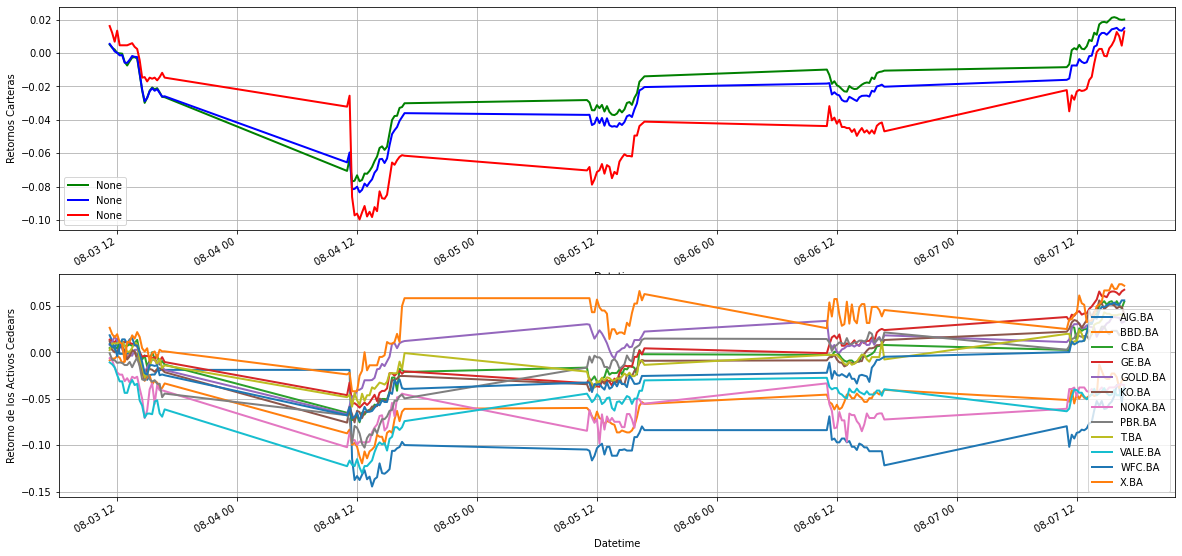

In [33]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211, ylabel='Retornos Carteras')
min.pct_change().cumsum().plot(ax=ax1, color='g', lw=2., legend=True)
CVAR.pct_change().cumsum().plot(ax=ax1, color='b', lw=2., legend=True)
benchmark.pct_change().cumsum().plot(ax=ax1, color='r', lw=2., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='Retorno de los Activos Cedears')
df.pct_change().cumsum().plot(ax=ax2, lw=2., legend=True)
ax2.grid()
plt.show()
